In [115]:
# Load data from pickle files
get_ipython().magic(u'pwd')
get_ipython().magic(u'cd "C:/Users/xxx"')

import jupyter_client
import ipykernel

import sys
import sqlite3
import time
import datetime
from pprint import pprint
import string
import itertools
import unicodedata 
import geocoder

from numpy import random, asarray, linspace, corrcoef
import pandas as pd
from pandas import Series

pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth',300)

%matplotlib inline 
import matplotlib.pyplot as plt
from pylab import* 

df_all = pd.read_pickle("df_all.pkl")
geo_df = pd.read_pickle("geo_df.pkl")
time_series_plot = pd.read_pickle("time_series_plot.pkl")

C:\Users\Wayne\Dropbox\Acer Laptop Sync\Data Science\justice4liang


In [1]:
# Load data from the raw SQLite database
get_ipython().magic(u'pwd')
get_ipython().magic(u'cd "C:/Users/XXXX"')

import jupyter_client
import ipykernel

import sys
import sqlite3
import time
import datetime
from pprint import pprint
import string
import itertools
import unicodedata 
import geocoder

from numpy import random, asarray, linspace, corrcoef
import pandas as pd
from pandas import Series

pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth',300)

%matplotlib inline 
import matplotlib.pyplot as plt
from pylab import* 

# connect to an existing database
con = sqlite3.connect("justice4liang.sqlite")
cur = con.cursor()
df_all = pd.read_sql_query("SELECT * FROM gfw_tweets", con)
#print("this database has:", len(df_all), "tweets.")
con.close()

df_all['created_at'] = pd.to_datetime(df_all['created_at'])
#df_all['created_at'] = df_all['created_at'].apply(lambda x: x.date())
df_all['created_at_copy'] = df_all['created_at'] 
df_all = df_all.sort(['created_at'])
df_all = df_all.set_index(['created_at'])
df_all.index = df_all.index.tz_localize('UTC').tz_convert('US/Eastern')

def rtornot(row):
    if row['retweeted_status'] == "THIS IS A RETWEET --> DOUBLE-CHECK JSON":
        return 1
    return 0

df_all['RT_or_not'] = df_all.apply(lambda row: rtornot(row), axis=1) 
#df_all    
print ("Total # of tweets in filtered PANDAS dataframe:", len(df_all))
df_all.head(2)

C:\Users\Wayne\Dropbox\Acer Laptop Sync\Data Science\justice4liang
('Total # of tweets in filtered PANDAS dataframe:', 55998)


C:\Users\wayne\Anaconda\lib\site-packages\ipykernel\__main__.py:38: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,id,query,tweet_id,inserted_date,truncated,language,possibly_sensitive,coordinates,retweeted_status,created_at_text,content,from_user_screen_name,from_user_id,from_user_followers_count,from_user_friends_count,from_user_listed_count,from_user_statuses_count,from_user_description,from_user_location,from_user_created_at,retweet_count,entities_urls,entities_urls_count,entities_hashtags,entities_hashtags_count,entities_mentions,entities_mentions_count,in_reply_to_screen_name,in_reply_to_status_id,source,entities_expanded_urls,json_output,entities_media_count,media_expanded_url,media_url,media_type,video_link,photo_link,twitpic,created_at_copy,RT_or_not
created_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-16 12:28:06-05:00,492,%2523justice4liang,699646448174919680,2016-02-17 22:57:20.846436,0,in,0,,,Tue Feb 16 17:28:06 +0000 2016,"Peter Liang, An Asian American Scapegoat? https://t.co/Z7r6gBVsa5 #justice4liang # @Justice4Liang #AkaiGurley #BLM #BlackLivesMatter",jinealogy,30453541,254,503,16,1122,"Writer, journalist, researcher, photographer.","Chicago, IL",Sat Apr 11 14:16:11 +0000 2009,2,https://t.co/Z7r6gBVsa5,1,"justice4liang, AkaiGurley, BLM, BlackLivesMatter",4,Justice4Liang,1,None,None,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",http://www.huffingtonpost.com/frank-h-wu/peter-liang-an-asian-amer_b_9225996.html,"{u'contributors': None, u'truncated': False, u'text': u'Peter Liang, An Asian American Scapegoat? https://t.co/Z7r6gBVsa5 #justice4liang # @Justice4Liang #AkaiGurley #BLM #BlackLivesMatter', u'is_quote_status': False, u'in_reply_to_status_id': None, u'id': 699646448174919680, u'favorite_count':...",,,,,0,0,0,2016-02-16 17:28:06,0
2016-02-16 12:30:30-05:00,491,%2523justice4liang,699647050573488129,2016-02-17 22:57:20.820887,0,en,0,,,Tue Feb 16 17:30:30 +0000 2016,Peter Liang is unlucky to be an Asian New York cop https://t.co/posA1ytbs2 @Justice4Liang #justice4liang #AkaiGurley #PeterLiang #BLM,jinealogy,30453541,254,503,16,1122,"Writer, journalist, researcher, photographer.","Chicago, IL",Sat Apr 11 14:16:11 +0000 2009,2,https://t.co/posA1ytbs2,1,"justice4liang, AkaiGurley, PeterLiang, BLM",4,Justice4Liang,1,None,None,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",http://atimes.com/2016/02/peter-liang-is-unlucky-to-be-an-asian-new-york-cop/,"{u'contributors': None, u'truncated': False, u'text': u'Peter Liang is unlucky to be an Asian New York cop https://t.co/posA1ytbs2 @Justice4Liang #justice4liang #AkaiGurley #PeterLiang #BLM', u'is_quote_status': False, u'in_reply_to_status_id': None, u'id': 699647050573488129, u'favorite_count':...",,,,,0,0,0,2016-02-16 17:30:30,0


In [2]:
#ones = np.ones(len(all_dates))
idx = pd.DatetimeIndex(df_all.index.strftime("%H:%M %Y/%m/%d"))
trend_df = pd.DataFrame(idx)
trend_df.columns = ['created_time']
trend_df['base_tweet_count'] = np.ones(len(df_all['created_at_copy']))
trend_df['rt_count'] = np.asarray(df_all['retweet_count'])
trend_df['follower_count'] = np.asarray(df_all['from_user_followers_count'])
trend_df['RT_or_not'] = np.asarray(df_all['RT_or_not'])
trend_df['cum_rt_count'] = trend_df.rt_count.cumsum()
trend_df['cum_follower_count'] = trend_df.follower_count.cumsum()
trend_df.head(200)

,created_time,base_tweet_count,rt_count,follower_count,RT_or_not,cum_rt_count,cum_follower_count
0,2016-02-16 12:28:00,1,2,254,0,2,254
1,2016-02-16 12:30:00,1,2,254,0,4,508
2,2016-02-16 12:57:00,1,1,254,0,5,762
3,2016-02-16 14:23:00,1,1,17,0,6,779
4,2016-02-16 14:45:00,1,1,14,1,7,793
5,2016-02-16 18:36:00,1,1,539,1,8,1332
6,2016-02-16 18:49:00,1,4,254,0,12,1586
7,2016-02-16 18:50:00,1,4,539,1,16,2125
8,2016-02-16 19:55:00,1,41,255,0,57,2380
9,2016-02-16 19:55:00,1,35,255,0,92,2635


In [39]:
hourly_cum_rt_count

2016-02-16 12:28:00          2
2016-02-16 12:30:00          4
2016-02-16 12:57:00          5
2016-02-16 14:23:00          6
2016-02-16 14:45:00          7
2016-02-16 18:36:00          8
2016-02-16 18:49:00         12
2016-02-16 18:50:00         16
2016-02-16 19:55:00         57
2016-02-16 19:55:00         92
2016-02-16 20:23:00         96
2016-02-16 20:24:00        106
2016-02-16 20:37:00        110
2016-02-16 20:45:00        120
2016-02-16 20:45:00        124
2016-02-16 20:46:00        159
2016-02-16 20:46:00        200
2016-02-16 20:47:00        200
2016-02-16 20:48:00        210
2016-02-16 20:48:00        214
2016-02-16 20:48:00        218
2016-02-16 20:50:00        253
2016-02-16 20:50:00        294
2016-02-16 20:51:00        294
2016-02-16 20:53:00        294
2016-02-16 20:57:00        367
2016-02-16 21:09:00        369
2016-02-16 21:09:00        442
2016-02-16 21:09:00        445
2016-02-16 21:27:00        518
                        ...   
2016-02-20 21:46:00    1271667
2016-02-

In [3]:
hourly_tweet_count = pd.Series(np.asarray(trend_df['base_tweet_count']), index=idx)
hourly_rt_count = pd.Series(np.asarray(trend_df['rt_count']), index=idx)
hourly_follower_count = pd.Series(np.asarray(trend_df['follower_count']), index=idx)
hourly_cum_rt_count = pd.Series(np.asarray(trend_df['cum_rt_count']), index=idx)
hourly_cum_follower_count = pd.Series(np.asarray(trend_df['cum_follower_count']), index=idx)

def getmax(row):
    return np.amax(row)

tweet_per_hr = hourly_tweet_count.resample('H', how="sum").fillna(0)
rt_per_hr = hourly_rt_count.resample('H', how="sum").fillna(0)
follower_per_hr = hourly_follower_count.resample('H', how="mean").fillna(0)
cum_rt_per_hr = hourly_cum_rt_count.resample('H', how=getmax)
cum_follower_per_hr = hourly_cum_follower_count.resample('H', how=getmax).fillna(0)

len(tweet_per_hr)

time_series_plot = pd.DataFrame(tweet_per_hr)
#time_series_plot = time_series_plot.append(rt_per_hr)
time_series_plot.columns = ['tweet_per_hr']
time_series_plot['rt_per_hr'] = rt_per_hr
time_series_plot['follower_per_hr'] = np.around(follower_per_hr)
time_series_plot['cum_rt_per_hr'] = cum_rt_per_hr
time_series_plot['cum_follower_per_hr'] = cum_follower_per_hr
time_series_plot

,tweet_per_hr,rt_per_hr,follower_per_hr,cum_rt_per_hr,cum_follower_per_hr
2016-02-16 12:00:00,3,5,254,5,762
2016-02-16 13:00:00,0,0,0,NaN,0
2016-02-16 14:00:00,2,2,16,7,793
2016-02-16 15:00:00,0,0,0,NaN,0
2016-02-16 16:00:00,0,0,0,NaN,0
2016-02-16 17:00:00,0,0,0,NaN,0
2016-02-16 18:00:00,3,9,444,16,2125
2016-02-16 19:00:00,2,76,255,92,2635
2016-02-16 20:00:00,16,275,40,367,3274
2016-02-16 21:00:00,14,425,37,792,3789


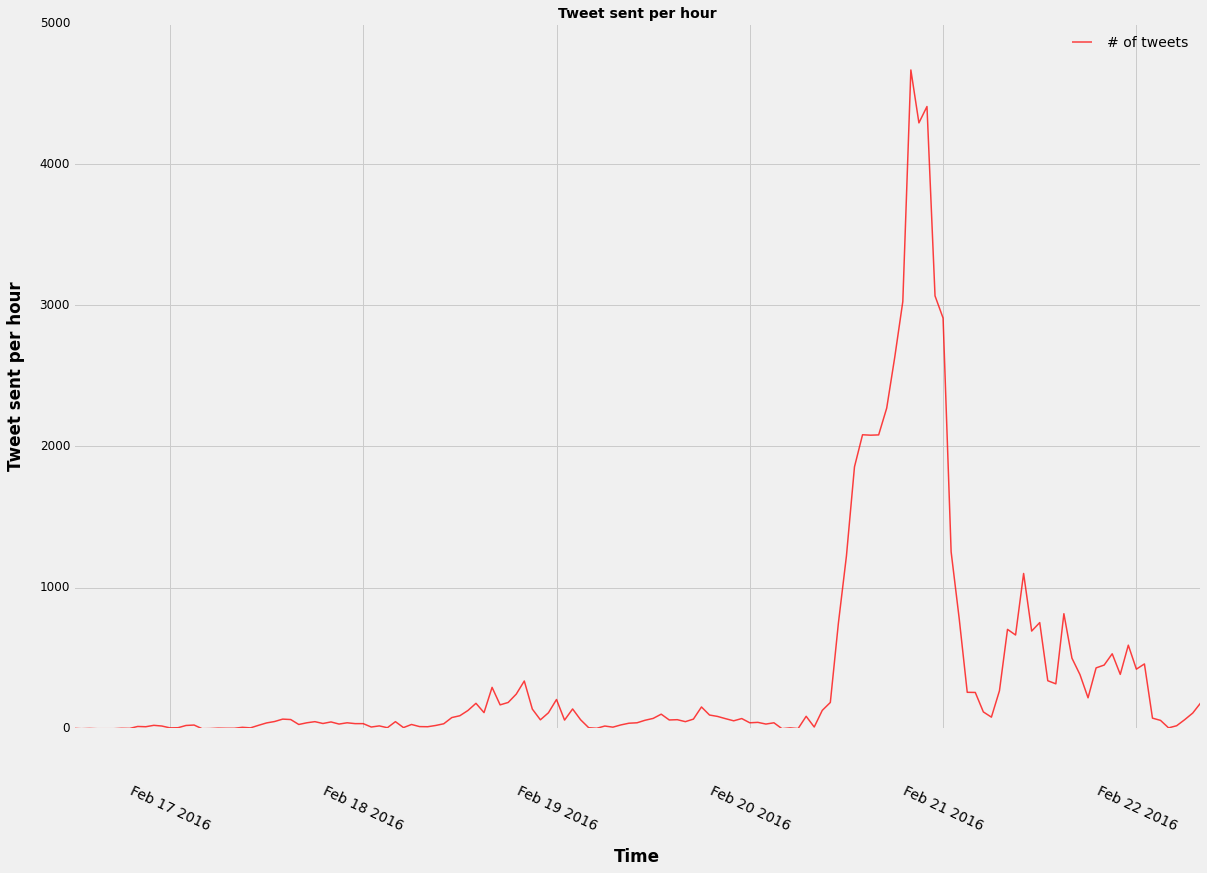

In [4]:
mpl.style.use('fivethirtyeight')

time_series_plot_public = time_series_plot["tweet_per_hr"].plot(kind='line', label = "# of tweets", color = "red",lw=1.5, alpha=0.75,legend=True, x_compat=True, figsize=(18, 14))
xticks(fontsize = 14, rotation = -25, ha ="center")                  #USE THE CUSTOM TICKS
time_series_plot_public.set_xlabel('Time', weight = 'bold', labelpad=15)  #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
time_series_plot_public.set_ylabel('Tweet sent per hour', weight='bold', labelpad=15) #SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL
time_series_plot_public.set_title('Tweet sent per hour', fontsize = 14, weight = 'bold')
#xticks(fontsize = 9, rotation = 0, ha= "center")                          #SET FONT SIZE FOR X-AXIS TICK LABELS
yticks(fontsize = 12)                                                      #SET FONT SIZE FOR Y-AXIS TICK LABELS
time_series_plot_public.tick_params(axis='x', pad=55)                                   #SET PADDING ABOVE X-AXIS LABELS
legend(fontsize='medium',loc=1,labelspacing=0.1, frameon=False)#.draggable()
#cumlike_plot.plot(figsize=(100,600))
#cumlike_plot.legend_ = True    
savefig('tweet_count.jpg', bbox_inches='tight', dpi=400, format='jpg')   #SAVE PLOT IN PNG FORMAT

In [5]:
# Plot for tweet volume by hour
import plotly.plotly as py
from plotly.graph_objs import *
import cufflinks as cf
py.sign_in('YOUR PLOT.LY USERNAME', 'YOUR PLOT.LY API KEY') #More at https://plot.ly/python/user-guide/

from datetime import datetime

time_series_hourly_tweet_volume = time_series_plot[["tweet_per_hr"]]

layout = Layout(
    title="#justice4liang Hourly Tweet Volume as of" + " " + time_series_plot.index[-1].strftime("%H:%M %Y/%m/%d") + " (EST)",
   
    titlefont=Font(
        family='Arial, sans-serif',
        size=22,
        color='black'
    ),
    
    font=Font(
        family='"Droid Sans", sans-serif',
        size=12
    ),
    
    showlegend=False,
    autosize=False,
    width=850,
    height=430,
    xaxis=XAxis(
        title='',
        titlefont=Font(
            family='"Verdana", monospace',
            size=12,
            color='black'
        ),
        range=[1440388800000, 1442462400000],
        type='date',
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=True,
        nticks=5,
        ticks='inside',
        ticklen=6,
        tickcolor='rgba(0, 0, 0, 0)',
        tickfont=Font(
            family='"Verdana", monospace',
            size=12,
            color='grey'
        ),
        
        mirror=False,
        gridcolor='white',
        gridwidth=1,
        zerolinecolor='#F6F6F6',
        zerolinewidth=1,
        linecolor='rgba(152, 0, 0, 0.5)',
        linewidth=1.5
    ),
    yaxis=YAxis(
        title='# of tweets',
        titlefont=Font(
            family='"Verdana", monospace',
            size=12,
            color='black'
        ),
        range=[-32.55555555555556, 638.5555555555555],
        type='linear',
        autorange=True,
        showgrid=True,
        zeroline=False,
        showline=True,
        nticks=5,
        ticks='',
        ticklen=6,
        tickcolor='rgba(0, 0, 0, 0)',
        tickfont=Font(
            family='"Verdana", monospace',
            size=12,
            color='black'
        ),
        mirror=False,
        gridcolor='white',
        gridwidth=1,
        zerolinecolor='#F6F6F6',
        zerolinewidth=1,
        linecolor='rgba(152, 0, 0, 0.5)',
        linewidth=1.5
    ),
    legend=Legend(
        x=0.9013254786450663,
        y=1.132,
        traceorder='normal',
        font=Font(
            family='Arial, sans-serif',
            size=12,
            color='#666666'
        ),
        bgcolor='rgb(240, 240, 240)',
        bordercolor='grey',
        borderwidth=0,
        xref='paper',
        yref='paper',
        xanchor='left',
        yanchor='top'
    ),
    paper_bgcolor='rgb(240, 240, 240)',
    plot_bgcolor='rgb(240, 240, 240)',
    bargap=0.2
)

cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

time_series_hourly_tweet_volume.iplot(kind='scatter', layout = layout, filename='justice4liang_hourly_tweet_volume')

In [6]:
# Plot for retweet per hour
import plotly.plotly as py
from plotly.graph_objs import *
import cufflinks as cf
py.sign_in('xxx', 'xxx')

from datetime import datetime


time_series_hourly_rt_volume = time_series_plot[["rt_per_hr"]]
layout = Layout(
    title="#justice4liang Hourly Retweet Volume as of" + " " + time_series_plot.index[-1].strftime("%H:%M %Y/%m/%d") + " (EST)",
    titlefont=Font(
        family='Arial, sans-serif',
        size=22,
        color='black'
    ),
    font=Font(
        family='"Droid Sans", sans-serif',
        size=12
    ),
    showlegend=False,
    autosize=False,
    width=850,
    height=430,
    xaxis=XAxis(
        title='',
        titlefont=Font(
            family='"Verdana", monospace',
            size=12,
            color='black'
        ),
        range=[1440388800000, 1442462400000],
        type='date',
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=True,
        nticks=5,
        ticks='inside',
        ticklen=6,
        tickcolor='rgba(0, 0, 0, 0)',
        tickfont=Font(
            family='"Verdana", monospace',
            size=12,
            color='grey'
        ),
        mirror=False,
        gridcolor='white',
        gridwidth=1,
        zerolinecolor='#F6F6F6',
        zerolinewidth=1,
        linecolor='rgba(152, 0, 0, 0.5)',
        linewidth=1.5
    ),
    yaxis=YAxis(
        title='# of retweets',
        titlefont=Font(
            family='"Verdana", monospace',
            size=12,
            color='black'
        ),
        range=[-32.55555555555556, 638.5555555555555],
        type='linear',
        autorange=True,
        showgrid=True,
        zeroline=False,
        showline=True,
        nticks=5,
        ticks='',
        ticklen=6,
        tickcolor='rgba(0, 0, 0, 0)',
        tickfont=Font(
            family='"Verdana", monospace',
            size=12,
            color='black'
        ),
        mirror=False,
        gridcolor='white',
        gridwidth=1,
        zerolinecolor='#F6F6F6',
        zerolinewidth=1,
        linecolor='rgba(152, 0, 0, 0.5)',
        linewidth=1.5
    ),
    legend=Legend(
        x=0.9013254786450663,
        y=1.132,
        traceorder='normal',
        font=Font(
            family='Arial, sans-serif',
            size=12,
            color='#666666'
        ),
        bgcolor='rgb(240, 240, 240)',
        bordercolor='grey',
        borderwidth=0,
        xref='paper',
        yref='paper',
        xanchor='left',
        yanchor='top'
    ),
    paper_bgcolor='rgb(240, 240, 240)',
    plot_bgcolor='rgb(240, 240, 240)',
    bargap=0.2
)

cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

time_series_hourly_rt_volume.iplot(kind='scatter', layout = layout, filename='justice4liang_hourly_rt_volume')

In [7]:
# Plot for audience size per hour
import plotly.plotly as py
from plotly.graph_objs import *
import cufflinks as cf
py.sign_in('xxx', 'xxx')

from datetime import datetime


time_series_hourly_audience = time_series_plot[["follower_per_hr"]]
layout = Layout(
    title="#justice4liang Hourly Audience Size as of" + " " + time_series_plot.index[-1].strftime("%H:%M %Y/%m/%d") + " (EST)",
    titlefont=Font(
        family='Arial, sans-serif',
        size=22,
        color='black'
    ),
    font=Font(
        family='"Droid Sans", sans-serif',
        size=12
    ),
    showlegend=False,
    autosize=False,
    width=850,
    height=430,
    xaxis=XAxis(
        title='',
        titlefont=Font(
            family='"Verdana", monospace',
            size=12,
            color='black'
        ),
        range=[1440388800000, 1442462400000],
        type='date',
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=True,
        nticks=5,
        ticks='inside',
        ticklen=6,
        tickcolor='rgba(0, 0, 0, 0)',
        tickfont=Font(
            family='"Verdana", monospace',
            size=12,
            color='grey'
        ),
        mirror=False,
        gridcolor='white',
        gridwidth=1,
        zerolinecolor='#F6F6F6',
        zerolinewidth=1,
        linecolor='rgba(152, 0, 0, 0.5)',
        linewidth=1.5
    ),
    yaxis=YAxis(
        title='avg. follower count of tweeters',
        titlefont=Font(
            family='"Verdana", monospace',
            size=12,
            color='black'
        ),
        range=[-32.55555555555556, 638.5555555555555],
        type='linear',
        autorange=True,
        showgrid=True,
        zeroline=False,
        showline=True,
        nticks=5,
        ticks='',
        ticklen=6,
        tickcolor='rgba(0, 0, 0, 0)',
        tickfont=Font(
            family='"Verdana", monospace',
            size=12,
            color='black'
        ),
        mirror=False,
        gridcolor='white',
        gridwidth=1,
        zerolinecolor='#F6F6F6',
        zerolinewidth=1,
        linecolor='rgba(152, 0, 0, 0.5)',
        linewidth=1.5
    ),
    legend=Legend(
        x=0.9013254786450663,
        y=1.132,
        traceorder='normal',
        font=Font(
            family='Arial, sans-serif',
            size=12,
            color='#666666'
        ),
        bgcolor='rgb(240, 240, 240)',
        bordercolor='grey',
        borderwidth=0,
        xref='paper',
        yref='paper',
        xanchor='left',
        yanchor='top'
    ),
    paper_bgcolor='rgb(240, 240, 240)',
    plot_bgcolor='rgb(240, 240, 240)',
    bargap=0.2
)

cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

time_series_hourly_audience.iplot(kind='scatter', layout = layout, filename='justice4liang_hourly_audience_size')

In [8]:
# Plot for cumulative rt count 
import plotly.plotly as py
from plotly.graph_objs import *
import cufflinks as cf
py.sign_in('xxx', 'xxx')

from datetime import datetime


time_series_hourly_audience = time_series_plot[["cum_rt_per_hr"]]
time_series_hourly_audience = time_series_hourly_audience.dropna()
layout = Layout(
    title="#justice4liang Cumulative Retweet Count as of" + " " + time_series_plot.index[-1].strftime("%H:%M %Y/%m/%d") + " (EST)",
    titlefont=Font(
        family='Arial, sans-serif',
        size=22,
        color='black'
    ),
    font=Font(
        family='"Droid Sans", sans-serif',
        size=12
    ),
    showlegend=False,
    autosize=False,
    width=850,
    height=430,
    xaxis=XAxis(
        title='',
        titlefont=Font(
            family='"Verdana", monospace',
            size=12,
            color='black'
        ),
        range=[1440388800000, 1442462400000],
        type='date',
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=True,
        nticks=5,
        ticks='inside',
        ticklen=6,
        tickcolor='rgba(0, 0, 0, 0)',
        tickfont=Font(
            family='"Verdana", monospace',
            size=12,
            color='grey'
        ),
        mirror=False,
        gridcolor='white',
        gridwidth=1,
        zerolinecolor='#F6F6F6',
        zerolinewidth=1,
        linecolor='rgba(152, 0, 0, 0.5)',
        linewidth=1.5
    ),
    yaxis=YAxis(
        title='# of retweets',
        titlefont=Font(
            family='"Verdana", monospace',
            size=12,
            color='black'
        ),
        range=[-32.55555555555556, 638.5555555555555],
        type='linear',
        autorange=True,
        showgrid=True,
        zeroline=False,
        showline=True,
        nticks=5,
        ticks='',
        ticklen=6,
        tickcolor='rgba(0, 0, 0, 0)',
        tickfont=Font(
            family='"Verdana", monospace',
            size=12,
            color='black'
        ),
        mirror=False,
        gridcolor='white',
        gridwidth=1,
        zerolinecolor='#F6F6F6',
        zerolinewidth=1,
        linecolor='rgba(152, 0, 0, 0.5)',
        linewidth=1.5
    ),
    legend=Legend(
        x=0.9013254786450663,
        y=1.132,
        traceorder='normal',
        font=Font(
            family='Arial, sans-serif',
            size=12,
            color='#666666'
        ),
        bgcolor='rgb(240, 240, 240)',
        bordercolor='grey',
        borderwidth=0,
        xref='paper',
        yref='paper',
        xanchor='left',
        yanchor='top'
    ),
    paper_bgcolor='rgb(240, 240, 240)',
    plot_bgcolor='rgb(240, 240, 240)',
    bargap=0.2
)

cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

time_series_hourly_audience.iplot(kind='scatter', layout = layout, filename='justice4liang_cumulative_rt_volume')

In [23]:
geo_df[1:50]

,from_user_location,content,coordinates,from_user_followers_count,RT_or_not,lat,lng
created_at,,,,,,,
2016-02-16 12:30:30-05:00,"Chicago, IL",Peter Liang is unlucky to be an Asian New York cop https://t.co/posA1ytbs2 @Justice4Liang #justice4liang #AkaiGurley #PeterLiang #BLM,,254,0,NaN,NaN
2016-02-16 12:57:20-05:00,"Chicago, IL",#justice4liang #BLM https://t.co/5TUEvKCthm,,254,0,NaN,NaN
2016-02-16 14:23:17-05:00,"Vancouver, British Columbia","Chinese community in North America is always too quiet. Let us speak up, protest and donate for #Peterliang #freepeterliang #justice4liang",,17,0,NaN,NaN
2016-02-16 14:45:29-05:00,,"RT @swz2000: Chinese community in North America is always too quiet. Let us speak up, protest and donate for #Peterliang #freepeterliang #j…",,14,1,NaN,NaN
2016-02-16 18:36:09-05:00,On da Tweet-ter,RT @jinealogy: #justice4liang #BLM https://t.co/5TUEvKCthm,,539,1,NaN,NaN
2016-02-16 18:49:15-05:00,"Chicago, IL",@PaperBagBiotch @Tornadoflavor @NYPDnews I agree! We should demand NYPD to take their share of responsibility! #Justice4Liang #blm #unite,,254,0,NaN,NaN
2016-02-16 18:50:30-05:00,On da Tweet-ter,RT @jinealogy: @PaperBagBiotch @Tornadoflavor @NYPDnews I agree! We should demand NYPD to take their share of responsibility! #Justice4Lian…,,539,1,NaN,NaN
2016-02-16 19:55:06-05:00,,"""How can police officers do their jobs when they know an accident will be criminalized?"" https://t.co/QsG6oYyIqa #PeterLiang #Justice4Liang",,255,0,NaN,NaN
2016-02-16 19:55:59-05:00,,"""This wasn’t a prosecution, it was a political persecution"" https://t.co/QsG6oYyIqa #PeterLiang #Justice4Liang",,255,0,NaN,NaN


In [ ]:
# create a separate dataframe for visualization
geo_df = df_all[['from_user_location', 'content', 'coordinates','from_user_followers_count', 'RT_or_not']]

In [51]:
for index, row in geo_df[50001:].iterrows():
    a = row['from_user_location']
    if a!='':
        try:
            g = geocoder.arcgis(a)
            #print g, '\n', '\n', '\n'
            k = abs(g.lat)+abs(g.lng) #used to minimize errors in geodecoding process
            if k >0:
                print ("currently processing index number:", index)
                print ([unicode(g.lat)], [unicode(g.lng)])
                #geo_df.ix[index,'lat'] = g.lat
                geo_df.loc[index,'lat'] = g.lat
                #geo_df.ix[index,'lng'] = g.lng
                geo_df.loc[index, 'lng'] = g.lng
        except: pass
        


currently processing index number: 2016-02-21 14:09:35-05:00
['40.78092648900048'] ['-73.67651816399967']
currently processing index number: 2016-02-21 14:09:35-05:00
['40.65009609900045'] ['-73.94957643299966']
currently processing index number: 2016-02-21 14:09:43-05:00
['40.65009609900045'] ['-73.94957643299966']
currently processing index number: 2016-02-21 14:09:54-05:00
['40.71426940400045'] ['-74.00596992899966']
currently processing index number: 2016-02-21 14:09:57-05:00
['33.01983969100047'] ['-96.69888720799969']
currently processing index number: 2016-02-21 14:10:15-05:00
['40.65009609900045'] ['-73.94957643299966']
currently processing index number: 2016-02-21 14:10:29-05:00
['40.65009609900045'] ['-73.94957643299966']
currently processing index number: 2016-02-21 14:10:51-05:00
['40.65009609900045'] ['-73.94957643299966']
currently processing index number: 2016-02-21 14:11:10-05:00
['40.65009609900045'] ['-73.94957643299966']
currently processing index number: 2016-02-21 

In [ ]:
for index, row in geo_df.iterrows():
    coords = str(row['lat']) + ', ' + str(row['lng'])
    print (coords)
    #coords.replace(' ,', ',')
    coords.replace(', ', ',')
    print (coords)
    geo_df.ix[index, 'coords_from_user_location'] = coords
    
geo_df['coords_combined'] = geo_df['coords_from_user_location']

41.85002711900046, -87.65004618299969
41.85002711900046, -87.65004618299969
41.85002711900046, -87.65004618299969
41.85002711900046, -87.65004618299969
41.85002711900046, -87.65004618299969
41.85002711900046, -87.65004618299969
49.2496564920005, -123.1193367139997
49.2496564920005, -123.1193367139997
nan, nan
nan, nan
nan, nan
nan, nan
41.85002711900046, -87.65004618299969
41.85002711900046, -87.65004618299969
nan, nan
nan, nan
nan, nan
nan, nan
nan, nan
nan, nan
38.89510783300045, -77.03636551799963
38.89510783300045, -77.03636551799963
37.33938888400047, -121.89495936199972
37.33938888400047, -121.89495936199972
nan, nan
nan, nan
41.66703735700048, -72.66647929299967
41.66703735700048, -72.66647929299967
41.66703735700048, -72.66647929299967
41.66703735700048, -72.66647929299967
41.66703735700048, -72.66647929299967
41.66703735700048, -72.66647929299967
41.66703735700048, -72.66647929299967
41.66703735700048, -72.66647929299967
nan, nan
nan, nan
nan, nan
nan, nan
nan, nan
nan, nan
na

In [3]:
for index, row in geo_df.iterrows():  
    print (row['coords_combined'])
    #if row['coords_combined']!='':
    if row['coordinates']!='':
        geo_df.ix[index,'coords_combined']=row['coordinates']
    if row['coordinates']=='0,0, 0.0':
        geo_df.ix[index,'coords_combined']=row['coords_from_user_location']
     
    #df['coords_from_user_location'] = df['lat'] + df['lng']
    #df.head(2)
geo_df['coords_combined'] = geo_df['coords_combined'].replace('0.0, 0.0', np.nan)

41.85002711900046, -87.65004618299969
41.85002711900046, -87.65004618299969
41.85002711900046, -87.65004618299969
49.2496564920005, -123.1193367139997
nan, nan
nan, nan
41.85002711900046, -87.65004618299969
nan, nan
nan, nan
nan, nan
38.89510783300045, -77.03636551799963
37.33938888400047, -121.89495936199972
nan, nan
41.66703735700048, -72.66647929299967
41.66703735700048, -72.66647929299967
41.66703735700048, -72.66647929299967
41.66703735700048, -72.66647929299967
nan, nan
nan, nan
nan, nan
nan, nan
39.414267263000454, -77.41053881499965
39.414267263000454, -77.41053881499965
nan, nan
nan, nan
nan, nan
40.74348981100047, -73.90710920199967
nan, nan
40.74348981100047, -73.90710920199967
nan, nan
nan, nan
nan, nan
37.77492773500046, -122.41941932299972
nan, nan
nan, nan
34.052228079000486, -118.24367736899967
34.052228079000486, -118.24367736899967
nan, nan
nan, nan
nan, nan
nan, nan
nan, nan
nan, nan
nan, nan
nan, nan
nan, nan
nan, nan
nan, nan
nan, nan
nan, nan
nan, nan
nan, nan
nan

In [ ]:
for index, row in geo_df.iterrows():  
    geo_df.ix[index,'geoloc_lat'] = row['coords_combined'].split(",")[0]
    temp_lng = row['coords_combined'].split(",")[1]
    temp_lng = temp_lng.replace(' ', '')
    print (temp_lng)
    geo_df.ix[index,'geoloc_lng'] = temp_lng
    
geo_df = geo_df[geo_df.coords_combined != "nan, nan"]

-87.65004618299969
-87.65004618299969
-87.65004618299969
-123.1193367139997
nan
nan
-87.65004618299969
nan
nan
nan
-77.03636551799963
-121.89495936199972
nan
-72.66647929299967
-72.66647929299967
-72.66647929299967
-72.66647929299967
nan
nan
nan
nan
-77.41053881499965
-77.41053881499965
nan
nan
nan
-73.90710920199967
nan
-73.90710920199967
nan
nan
nan
-122.41941932299972
nan
nan
-118.24367736899967
-118.24367736899967
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
-96.80666614399968
nan
-94.10184816399965
-94.10184816399965
-79.41629882799964
-79.41629882799964
-87.65004618299969
-122.41941932299972
-94.10184816399965
-94.10184816399965
nan
nan
-94.10184816399965
nan
-94.10184816399965
-73.90710920199967
nan
nan
nan
-94.10184816399965
-94.10184816399965
nan
nan
-121.89495936199972
-74.49986860199965
nan
nan
-94.10184816399965
-93.26383802699968
-93.26383802699968
-93.26383802699968
-111.93657804799972
-123.1193367139997
nan
n

In [2]:
geo_df

,from_user_location,content,coordinates,from_user_followers_count,RT_or_not,lat,lng,coords_from_user_location,coords_combined
created_at,,,,,,,,,
2016-02-16 12:28:06-05:00,"Chicago, IL","Peter Liang, An Asian American Scapegoat? https://t.co/Z7r6gBVsa5 #justice4liang # @Justice4Liang #AkaiGurley #BLM #BlackLivesMatter",,254,0,41.850027,-87.650046,"41.85002711900046, -87.65004618299969","41.85002711900046, -87.65004618299969"
2016-02-16 12:30:30-05:00,"Chicago, IL",Peter Liang is unlucky to be an Asian New York cop https://t.co/posA1ytbs2 @Justice4Liang #justice4liang #AkaiGurley #PeterLiang #BLM,,254,0,41.850027,-87.650046,"41.85002711900046, -87.65004618299969","41.85002711900046, -87.65004618299969"
2016-02-16 12:57:20-05:00,"Chicago, IL",#justice4liang #BLM https://t.co/5TUEvKCthm,,254,0,41.850027,-87.650046,"41.85002711900046, -87.65004618299969","41.85002711900046, -87.65004618299969"
2016-02-16 14:23:17-05:00,"Vancouver, British Columbia","Chinese community in North America is always too quiet. Let us speak up, protest and donate for #Peterliang #freepeterliang #justice4liang",,17,0,49.249656,-123.119337,"49.2496564920005, -123.1193367139997","49.2496564920005, -123.1193367139997"
2016-02-16 14:45:29-05:00,,"RT @swz2000: Chinese community in North America is always too quiet. Let us speak up, protest and donate for #Peterliang #freepeterliang #j…",,14,1,NaN,NaN,"nan, nan","nan, nan"
2016-02-16 18:36:09-05:00,On da Tweet-ter,RT @jinealogy: #justice4liang #BLM https://t.co/5TUEvKCthm,,539,1,NaN,NaN,"nan, nan","nan, nan"
2016-02-16 18:49:15-05:00,"Chicago, IL",@PaperBagBiotch @Tornadoflavor @NYPDnews I agree! We should demand NYPD to take their share of responsibility! #Justice4Liang #blm #unite,,254,0,41.850027,-87.650046,"41.85002711900046, -87.65004618299969","41.85002711900046, -87.65004618299969"
2016-02-16 18:50:30-05:00,On da Tweet-ter,RT @jinealogy: @PaperBagBiotch @Tornadoflavor @NYPDnews I agree! We should demand NYPD to take their share of responsibility! #Justice4Lian…,,539,1,NaN,NaN,"nan, nan","nan, nan"
2016-02-16 19:55:06-05:00,,"""How can police officers do their jobs when they know an accident will be criminalized?"" https://t.co/QsG6oYyIqa #PeterLiang #Justice4Liang",,255,0,NaN,NaN,"nan, nan","nan, nan"


In [12]:
import folium

justice4liang_map = folium.Map(location = [39.828175, -98.5795], zoom_start = 3)
for index, row in geo_df.iterrows():
    justice4liang_map.simple_marker(location = [row['geoloc_lat'], row['geoloc_lng']], popup='I tweeted')

justice4liang_map

In [116]:
ds = pd.Timestamp('2016-02-22 00:02:07-05:00')
df_for_show.index.get_loc(ds)

17250

In [123]:
import plotly.plotly as py
py.sign_in('xxx', 'xxx')
df_for_show = geo_df[['geoloc_lat','geoloc_lng','from_user_followers_count','content', 'RT_or_not']]
df_for_show.columns = ['lat', 'lon','from_user_followers_count','content', 'retweet or not']

limits = [(0,30), (31, 189), (190, 789), (790,1305), (1306, 12983), (12984,17250), (17251, 17645)]
colors = ["rgb(0,116,217)","rgb(178,57,162)","rgb(133,20,75)","rgb(255,133,27)","rgb(220,211,147)", "rgb(6,39,96)", "rgb(32,248,183)"]
location = []
names = ['2-16-2016','2-17-2016','2-18-2016','2-19-2016', '2-20-2016', '2-21-2016', '2-22-2016']
scale = 5000

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df_for_show[lim[0]:lim[1]]
    locale = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['content'],
        marker = dict(
            size = (df_sub['from_user_followers_count'])/85+9,
            #size = 5,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
    
        #name = '{0} - {1}'.format(lim[0],lim[1]) )
        name = names[i])
    location.append(locale)

layout = dict(
        title = 'Mapping #justice4liang',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=location, layout=layout )
url = py.plot( fig, validate=False, filename='d3-bubble-map-justice4liang' )

In [5]:
df_all.to_pickle('df_all.pkl')
geo_df.to_pickle('geo_df.pkl')
time_series_plot.to_pickle('time_series_plot.pkl')